# Object Segmentation (tách vật thể trong ảnh)
## Đặt vấn đề
Giả sử chúng ta có bức ảnh dưới đây và muốn thuật toán tự động nhận ra vùng khuôn mặt và tách nó ra.
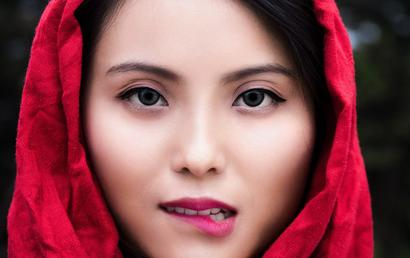

## Lên ý tưởng
Bức ảnh có ba màu chủ đạo: hồng ở khăn và môi; đen ở mắt, tóc, và hậu cảnh; màu da ở vùng còn lại của khuôn mặt. Vậy chúng ta có thể áp dụng thuật toán K-means clustering để phân các pixel ảnh thành 3 clusters, sau đó chọn cluster chứa phần khuôn mặt (phần này do con người làm).

Đây là một bức ảnh màu, mỗi điểm ảnh sẽ được biểu diễn bới 3 giá trị tương ứng với màu Red, Green, và Blue (mỗi giá trị này cũng là một số tự nhiên không vượt quá 255). Nếu ta coi mỗi điểm dữ liệu là một vector 3 chiều chứa các giá trị này, sau đó áp dụng thuật toán K-means clustering, chúng ta có thể có kết quả mong muốn.




## Hiện thực

In [27]:
ls

drive/  sample_data/


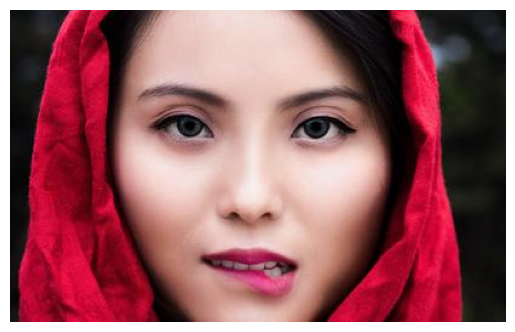

In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/girl3 (1).jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[[12, 14, 11],
        [12, 14, 11],
        [11, 13, 10],
        ...,
        [12, 13, 15],
        [12, 13, 15],
        [12, 13, 15]],

       [[12, 14, 11],
        [12, 14, 11],
        [12, 14, 11],
        ...,
        [12, 13, 15],
        [12, 13, 15],
        [12, 13, 15]],

       [[13, 15, 12],
        [13, 15, 12],
        [13, 15, 12],
        ...,
        [13, 14, 16],
        [12, 13, 15],
        [12, 13, 15]],

       ...,

       [[20, 26, 26],
        [20, 24, 25],
        [19, 17, 20],
        ...,
        [24, 27, 18],
        [23, 26, 17],
        [23, 26, 17]],

       [[20, 19, 24],
        [23, 21, 26],
        [24, 14, 22],
        ...,
        [23, 29, 19],
        [23, 29, 19],
        [23, 29, 19]],

       [[21, 19, 24],
        [25, 20, 26],
        [26, 13, 22],
        ...,
        [23, 29, 19],
        [23, 29, 19],
        [23, 29, 19]]], dtype=uint8)
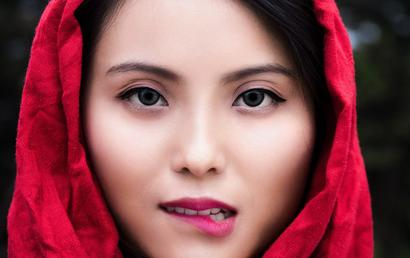

In [30]:
img

In [31]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [32]:
X.shape

(105780, 3)

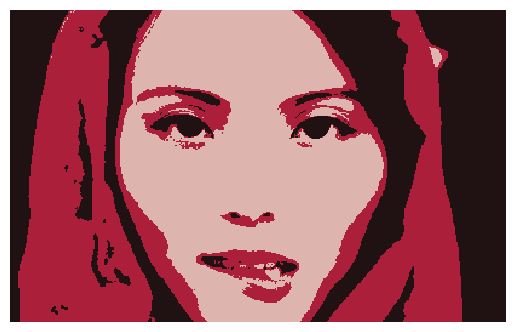

In [33]:
kmeans = KMeans(n_clusters=3).fit(X)
label = kmeans.predict(X)

img4 = np.zeros_like(X)
# replace each pixel by its center
for k in range(3):
    img4[label == k] = kmeans.cluster_centers_[k]
# reshape and display output image
img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()

## Bài tập 2: Thử lại đoạn code trên với hình tree.jpg. Hãy xác định số cluster phù hợp.

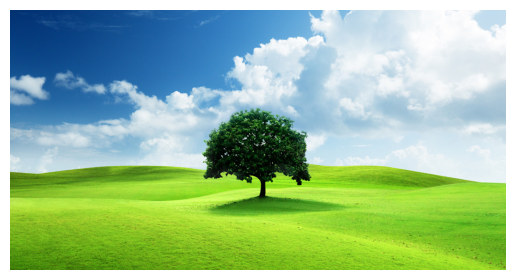

In [34]:
# Code bài tập 2 ở đây
img_phototree = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/tree.jpg')
plt.imshow(img_phototree)
imgplot = plt.imshow(img_phototree)
plt.axis('off')
plt.show()

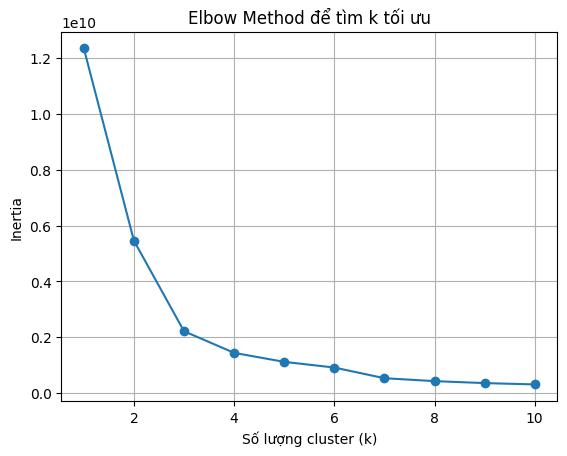

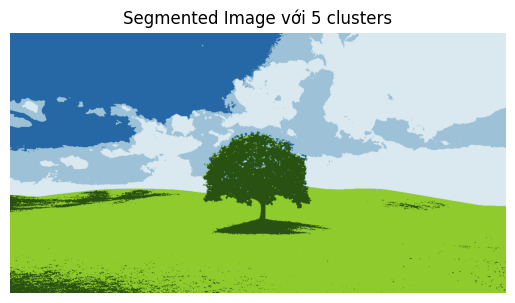

In [38]:
# Load ảnh
# Import để mở và xử lý ảnh
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/tree.jpg')
img = np.array(img) # Chuyển ảnh sang định dạng mảng numpy (ma trận số)

# Chuyển ảnh thành ma trận 2D (pixels x RGB)
pixel_matrix = img.reshape(-1, 3) # Chuyển ảnh từ 3D (H x W x 3) thành 2D (H*W x 3) để đưa vào KMeans

# Dùng Elbow Method để xác định số cluster phù hợp
inertia = [] # Danh sách lưu inertia (độ lỗi nội cụm) cho từng k
cluster_range = range(1, 11) # Duyệt k từ 1 đến 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixel_matrix) # Huấn luyện mô hình KMeans với k cụm
    inertia.append(kmeans.inertia_) # Lưu tổng lỗi (inertia) để vẽ biểu đồ Elbow

# Vẽ biểu đồ Elbow
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Số lượng cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm k tối ưu')
plt.grid(True)
plt.show()

# Sau khi xem biểu đồ và chọn k phù hợp
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(pixel_matrix)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Tạo ảnh phân đoạn từ kết quả clustering
segmented_img = centers[labels].reshape(img.shape).astype(np.uint8)

# Hiển thị ảnh
plt.imshow(segmented_img)
plt.axis('off')
plt.title(f'Segmented Image với {optimal_k} clusters')
plt.show()

# Image Compression (nén ảnh và nén dữ liệu nói chung)
Để ý thấy rằng mỗi một pixel có thể nhận một trong số 256^3=16,777,216. Đây là một số rất lớn (tương đương với 24 bit cho một điểm ảnh). Nếu ta muốn lưu mỗi điểm ảnh với một số bit nhỏ hơn và chấp nhận mất dữ liệu ở một mức nào đó, có cách nào không nếu ta chỉ biết K-means clustering?

Câu trả lời là có. Trong bài toán Segmentation phía trên, ở hình cô gái chúng ta có 3 clusters, và mỗi một điểm ảnh sau khi xử lý sẽ được biểu diễn bởi 1 số tương ứng với 1 cluster. Tuy nhiên, chất lượng bức ảnh rõ ràng đã giảm đi nhiều.

## Bài tập 3: Các bạn hãy thử với số lượng clusters khác là 5, 10, 15, 20. Nhận xét xem chất lượng hình thay đổi thế nào.

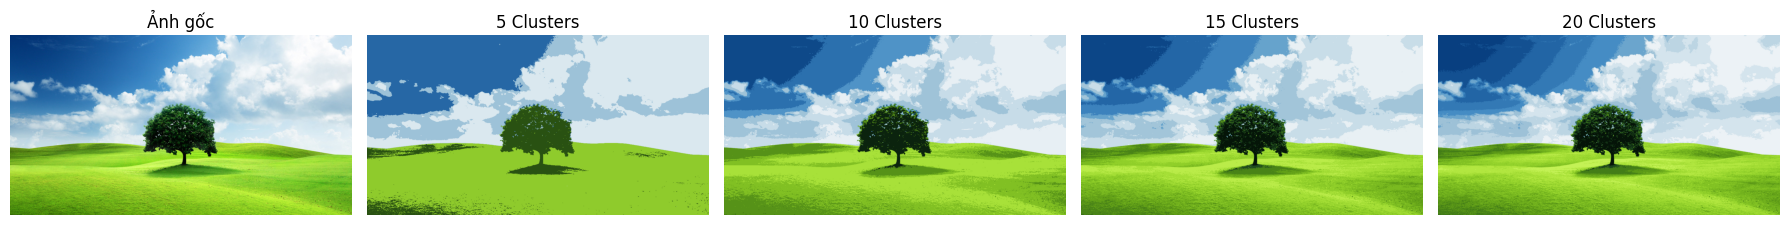

In [43]:
# Load ảnh gốc
img = Image.open('/content/drive/MyDrive/Colab Notebooks/tree.jpg')
img = img.convert('RGB')  # đảm bảo ảnh RGB
img_np = np.array(img)

# Chuyển ảnh thành ma trận 2D (pixel x RGB)
h, w, c = img_np.shape # Lấy kích thước ảnh: height, width, channels (3 màu)
img_2d = img_np.reshape(-1, 3) # Chuyển ảnh từ (H x W x 3) sang (H*W x 3) để đưa vào KMeans

# Danh sách số cluster cần thử
cluster_list = [5, 10, 15, 20]

# Hàm phân đoạn ảnh bằng KMeans
def segment_image(img_2d, k):
    kmeans = KMeans(n_clusters=k, random_state=42) # Định nghĩa hàm phân đoạn ảnh theo KMeans
    labels = kmeans.fit_predict(img_2d)  # Gán nhãn cho từng điểm ảnh
    centers = kmeans.cluster_centers_ # Lấy tâm của các cụm (màu RGB đại diện)
    segmented = centers[labels].reshape(h, w, 3).astype(np.uint8)# Dựng lại ảnh từ nhãn và tâm cụm
    return segmented  # Trả về ảnh phân cụm

# Vẽ ảnh gốc và các ảnh đã phân đoạn
plt.figure(figsize=(18, 5))
plt.subplot(1, len(cluster_list)+1, 1)
plt.imshow(img_np)
plt.title('Ảnh gốc')
plt.axis('off')

# Duyệt qua từng số cluster và vẽ ảnh phân đoạn
for i, k in enumerate(cluster_list):
    segmented_img = segment_image(img_2d, k)
    plt.subplot(1, len(cluster_list)+1, i+2)
    plt.imshow(segmented_img)
    plt.title(f'{k} Clusters')
    plt.axis('off')

plt.tight_layout()
plt.show()